In [182]:
#import libraries
import pandas as pd
import numpy as np

#import plot libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder

In [183]:
#loading datasets
clients = pd.read_csv('clients.csv')
customer = pd.read_csv('customers.csv')
messages = pd.read_csv('messages.csv')

**File 1: clients dataset**

In [184]:
#file 1 inspection
print(clients.columns.is_unique)
print(clients.shape)
print(clients[clients.duplicated()== True])
clients.info()

True
(8, 4)
Empty DataFrame
Columns: [id, name, product_type, country]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            8 non-null      object
 1   name          8 non-null      object
 2   product_type  8 non-null      object
 3   country       8 non-null      object
dtypes: object(4)
memory usage: 384.0+ bytes


In [185]:
#change column name,prepare for datasets join
clients = clients.rename(
    columns = {'id':'client_id'})
clients.describe()

,client_id,name,product_type,country
count,8,8,8,8
unique,8,8,3,3
top,cfcd208495d565ef66e7dff9f98764da,SwanPay,BNPL,UK
freq,1,1,3,3


Key insight: 

--no missing values in the dataset
--all object features
--all columns are unique, no duplicate rows identified

In [186]:
clients.head()

,client_id,name,product_type,country
0,cfcd208495d565ef66e7dff9f98764da,SwanPay,BNPL,UK
1,c4ca4238a0b923820dcc509a6f75849b,Fox Energy,Energy,UK
2,c81e728d9d4c2f636f067f89cc14862c,Badgerbank,CreditCard,UK
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,KiwiPay,BNPL,NZ
4,a87ff679a2f3e71d9181a67b7542122c,Skink Solar,Energy,NZ


**File 2 : customer dataset**

In [187]:
#File 2 inspection
print(customer.columns.is_unique)
print(customer.shape)
print(customer[customer.duplicated()==True])
customer.info()

True
(10000, 6)
Empty DataFrame
Columns: [id, client_id, gender, country, age, created_at]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          10000 non-null  object 
 1   client_id   10000 non-null  object 
 2   gender      7979 non-null   object 
 3   country     8058 non-null   object 
 4   age         8575 non-null   float64
 5   created_at  10000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 468.9+ KB


In [188]:
customer.describe()

,age
count,8575.000000
mean,40.950204
std,17.641473
min,18.000000
25%,25.000000
50%,38.000000
75%,52.000000
max,96.000000


Key insight:  

-- missing values in the 'gender','country','age'
--all object features but 'age'
--all columns are unique, no duplicate rows identified

In [189]:
customer.head()

,id,client_id,gender,country,age,created_at
0,a40ee72e10612613885de1208e1b9500,c4ca4238a0b923820dcc509a6f75849b,M,NaN,73.0,2021-01-01 00:10:23.616000+00:00
1,15c286543a1dbf6ab2c855747f751cb7,cfcd208495d565ef66e7dff9f98764da,NaN,NaN,27.0,2021-01-01 01:49:55.064000+00:00
2,f088f7d46f6d5d5b608bfc019e25e54b,1679091c5a880faf6fb5e6087eb1b2dc,F,CA,NaN,2021-01-01 01:56:54.809000+00:00
3,5074192370542d6bcb706b16aa85e116,8f14e45fceea167a5a36dedd4bea2543,M,CA,NaN,2021-01-01 02:09:55.996000+00:00
4,131f5ce2b70940714231349e3ef14b39,cfcd208495d565ef66e7dff9f98764da,M,UK,31.0,2021-01-01 02:35:24.169000+00:00


In [190]:
#join file 1&2 on key 'client_id'
client_customer = pd.merge(customer,clients,left_on=['client_id'], right_on=['client_id'], how = 'left')

In [191]:
#change column name,prepare for next stage of datasets join
client_customer = client_customer.rename(
    columns = {'country_x':'country_customer','country_y':'country_client','name':'client_name','id':'customer_id'})
client_customer.head()

,customer_id,client_id,gender,country_customer,age,created_at,client_name,product_type,country_client
0,a40ee72e10612613885de1208e1b9500,c4ca4238a0b923820dcc509a6f75849b,M,NaN,73.0,2021-01-01 00:10:23.616000+00:00,Fox Energy,Energy,UK
1,15c286543a1dbf6ab2c855747f751cb7,cfcd208495d565ef66e7dff9f98764da,NaN,NaN,27.0,2021-01-01 01:49:55.064000+00:00,SwanPay,BNPL,UK
2,f088f7d46f6d5d5b608bfc019e25e54b,1679091c5a880faf6fb5e6087eb1b2dc,F,CA,NaN,2021-01-01 01:56:54.809000+00:00,Moose Money,BNPL,CA
3,5074192370542d6bcb706b16aa85e116,8f14e45fceea167a5a36dedd4bea2543,M,CA,NaN,2021-01-01 02:09:55.996000+00:00,Eagle Energy,Energy,CA
4,131f5ce2b70940714231349e3ef14b39,cfcd208495d565ef66e7dff9f98764da,M,UK,31.0,2021-01-01 02:35:24.169000+00:00,SwanPay,BNPL,UK


**File 3: messages dataset**

In [192]:
# File 3 inspection
print(messages.columns.is_unique)
print(messages.shape)
print(messages[messages.duplicated()==True])
messages.info()

True
(145941, 5)
Empty DataFrame
Columns: [id, customer_id, sent_at, clicked, converted]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145941 entries, 0 to 145940
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           145941 non-null  object
 1   customer_id  145941 non-null  object
 2   sent_at      145941 non-null  object
 3   clicked      145941 non-null  int64 
 4   converted    145941 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 5.6+ MB


In [193]:
messages.describe()

,clicked,converted
count,145941.000000,145941.000000
mean,0.064231,0.021529
std,0.245166,0.145141
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


Key insight:    
-- no missing values in the dataset
--all object features but 'clicked','converted'
-- 'clicked' and 'converted' values between 1 and 0
-- 'converted' mean lower than 'clicked'
--all columns are unique, no duplicate rows identified

In [194]:
messages.head()

,id,customer_id,sent_at,clicked,converted
0,28d82c62db5989d9441351f58738c6a8,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-04 10:03:16.376000+00:00,0,0
1,61407843c408f8f9b98df94a649c0dd3,9042b6cec8fc08a2c9d8197353215daf,2021-01-04 10:42:47.027000+00:00,0,0
2,175fd64b8aa5a049f8a0d39ec00e5009,5074192370542d6bcb706b16aa85e116,2021-01-04 11:18:23.996000+00:00,1,1
3,111a3189c6155983b91618f7ec5c1566,7fa0e965af2e30530dba2fad1d3dcfc2,2021-01-04 12:53:56.733000+00:00,0,0
4,b5b27ad6c3dbf19f2627d2068dafddf2,d2c003d1c9594ea11f492746bca99ea7,2021-01-04 12:54:02.700000+00:00,0,0


In [195]:
#final join table with messages dataset, on key customer_id
df = pd.merge(messages,client_customer,left_on=['customer_id'], right_on=['customer_id'], how = 'left')

In [196]:
print(df.columns.is_unique)
print(df.shape)
print(df[df.duplicated()==True])
df.info()

True
(145941, 13)
Empty DataFrame
Columns: [id, customer_id, sent_at, clicked, converted, client_id, gender, country_customer, age, created_at, client_name, product_type, country_client]
Index: []
<class 'pandas.core.frame.DataFrame'>
Int64Index: 145941 entries, 0 to 145940
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                145941 non-null  object 
 1   customer_id       145941 non-null  object 
 2   sent_at           145941 non-null  object 
 3   clicked           145941 non-null  int64  
 4   converted         145941 non-null  int64  
 5   client_id         145941 non-null  object 
 6   gender            114265 non-null  object 
 7   country_customer  115795 non-null  object 
 8   age               123921 non-null  float64
 9   created_at        145941 non-null  object 
 10  client_name       145941 non-null  object 
 11  product_type      145941 non-null  object 
 12  country_client 

In [197]:
df.describe()

,clicked,converted,age
count,145941.000000,145941.000000,123921.000000
mean,0.064231,0.021529,43.041857
std,0.245166,0.145141,17.772985
min,0.000000,0.000000,18.000000
25%,0.000000,0.000000,26.000000
50%,0.000000,0.000000,44.000000
75%,0.000000,0.000000,55.000000
max,1.000000,1.000000,96.000000


Key insight:    
-- missing values in the dataset, 'gender', 'country_customer', 'age'
-- all object features but 'clicked','converted','age'
-- 'clicked' and 'converted' values between 1 and 0
-- 'converted' mean lower than 'clicked'
--all columns are unique, no duplicate rows identified
-- 'clicked','converted','age columns have diffrent scale range

In [198]:
df=df.drop(columns=['customer_id','id','client_id','created_at'])

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145941 entries, 0 to 145940
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sent_at           145941 non-null  object 
 1   clicked           145941 non-null  int64  
 2   converted         145941 non-null  int64  
 3   gender            114265 non-null  object 
 4   country_customer  115795 non-null  object 
 5   age               123921 non-null  float64
 6   client_name       145941 non-null  object 
 7   product_type      145941 non-null  object 
 8   country_client    145941 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 11.1+ MB


In [200]:
#fix missing values
#fill NaN in 'country_customer' column with 'country_client' value
df['country_customer']=df['country_customer'].fillna(df['country_client'])

**Find correlation between 'converted' and age/gender**

<AxesSubplot:title={'center':'Customer age by gender'}, xlabel='gender', ylabel='age'>

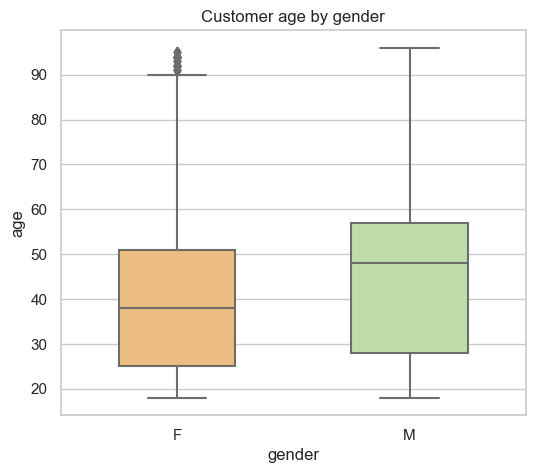

In [201]:
# box plot visualization about the distrubution of customer' gender vs age
sns.set_theme(style='whitegrid')
fig,ax = plt.subplots(figsize=(6,5))
ax.set_title('Customer age by gender')
sns.boxplot(data=df,x='gender',y='age',palette='Spectral',width=.5)

The boxplot shows the customer age per gender group over a 10 months period. 
In female group, the median of age was about 38 years old, which is the lower than male group. 12 years lower than the median age of male borrowers. 
The upper quartile age in female group was about 50, a lower of 13.7%, compared to male group age (58 years old).

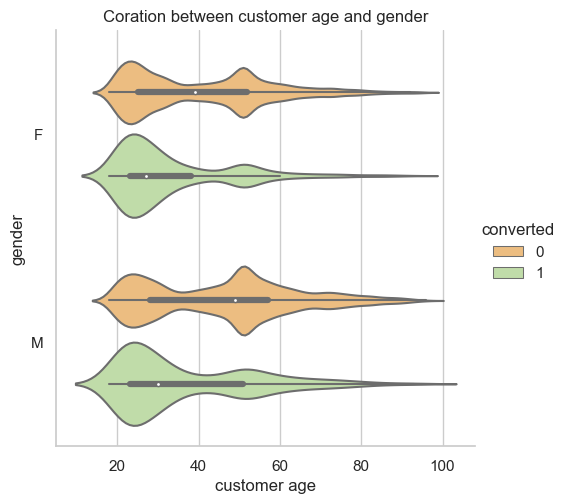

In [202]:
#ralted to gender and age?
# box plot visualization about the distrubution of customer' gender vs age
age_count= sns.catplot(x='age', y='gender', kind='violin',hue = 'converted',palette='Spectral', data=df)

# add label and title
age_count.set(xlabel = 'customer age', ylabel = 'gender',title = 'Coration between customer age and gender')

In [203]:
#calculate median age for female and male
df.groupby('gender', as_index=False).converted.sum()

,gender,converted
0,F,1403
1,M,1201


Key insight:    

-- outliers observed

Among the customers who do not choose Indebted products,middle-aged men are more than women, concentrated in about 50 years old.
The customers who choose Indebted products are mainly young people, aged 23-30 years old. In the lower age group, male customers outnumber female customers.
Therefore, there is a strong link between customer gender, age and conversion rates.

violin figure shows the the customer age per gender group over a 10 months period.Among the customers who do not choose Indebted products,middle-aged men are more than women, concentrated in about 50 years old. 11 years older than the median age of female customers.The upper quartile age in male group who do not choose Indebted products was about 58, a older of 16%, compared to female group age (50 years old).

The customers who choose Indebted products are mainly young people, aged 28-30 years old. In the both of gender groups, male customers slightly outnumber female customers.

Therefor a strong link between customer gender, age and conversion rates.

**Find correlation between 'converted' and region,client,product type**

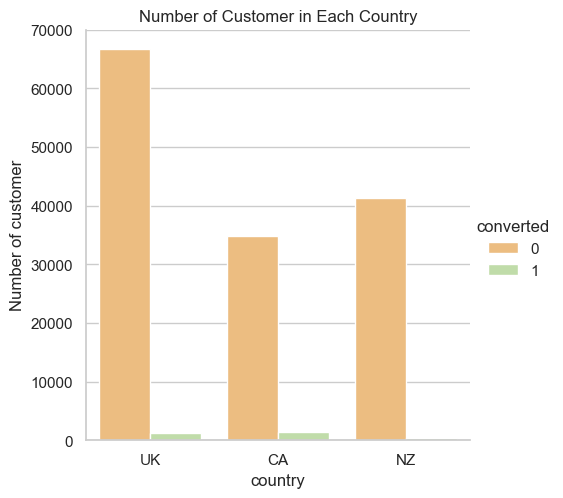

In [204]:
#ralted to region?
# plot and count number of customer in each country 
country_count= sns.catplot(x='country_customer', kind='count',hue = 'converted',palette='Spectral', data=df)

# add label and title
country_count.set(xlabel = 'country', ylabel = 'Number of customer',title = 'Number of Customer in Each Country')

In [205]:
#calculate sum of converted for each country

df.groupby('country_customer', as_index=False).converted.sum()

,country_customer,converted
0,CA,1413
1,NZ,438
2,UK,1291


The UK has the most customers (66,000), but not the highest conversion value (1291), whereas CA has the most conversion value (1413) and the lowest number of customers (33,000). New Zealand's conversion value is at least 438.

This observation may be due to customers in the UK and New Zealand having other debt options, or having questions about the product, or having different spending/repayment habits.

Therefore, the correlation between the customer location and the target conversion rate may be low, and the country_client feature may have a similar situation.

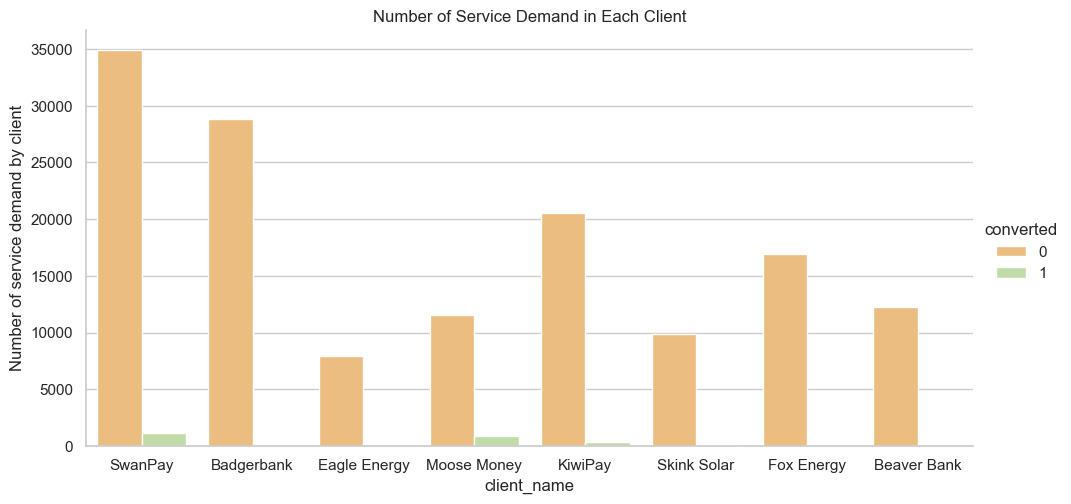

In [206]:
#ralted to client?
# plot and count number of customer in each client

client_count= sns.catplot(x='client_name', kind='count',hue = 'converted',palette='Spectral', data=df, aspect =2)

# add label and title
client_count.set(xlabel = 'client_name', ylabel = 'Number of service demand by client',title = 'Number of Service Demand in Each Client')

In [207]:
#calculate sum of converted for each client

df.groupby('client_name', as_index=False).converted.sum()

,client_name,converted
0,Badgerbank,169
1,Beaver Bank,175
2,Eagle Energy,145
3,Fox Energy,179
4,KiwiPay,373
5,Moose Money,861
6,Skink Solar,59
7,SwanPay,1181


The SwanPay has the most service demand(35,000),it has the highest conversion value (1181), whereas Moose Money has the second most conversion value (861) but the low service demand (11,000). Skink Solar's conversion value is at least 59. Eagle Energy had the least service demand 7,500.

Therefore, the correlation between the service demand and the target conversion rate may be low.

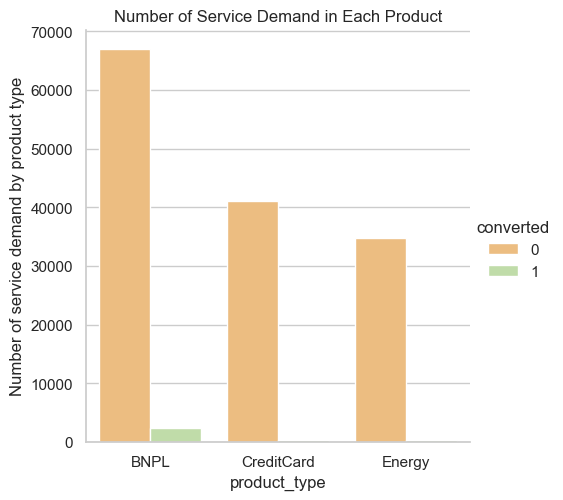

In [208]:
#ralte to product type?
# plot and count number of customer in each product type

client_count= sns.catplot(x='product_type', kind='count',hue = 'converted',palette='Spectral', data=df)

# add label and title
client_count.set(xlabel = 'product_type', ylabel = 'Number of service demand by product type',title = 'Number of Service Demand in Each Product')


In [209]:
#calculate sum of converted for each client

df.groupby('product_type', as_index=False).converted.sum()

,product_type,converted
0,BNPL,2415
1,CreditCard,344
2,Energy,383


The BNPL has the most service demand(66,000),it has the highest conversion value (2415), whereas Credit Card has the second most service demand 40,000, conversion value (861), but it has a similar conversion value to energy, 344 and 383, respectively. Energy had the least service demand 34,000.

Therefore, the correlation between the prodouct type and the target conversion rate may be intermediate.

In [210]:
#fill missing values
#fill NaN in 'age' column with median values
#groupby remove rows where gender is NaN 
df = df.groupby(['gender'], group_keys=False).apply(lambda x: x.fillna(x.median()))
df.head()

,sent_at,clicked,converted,gender,country_customer,age,client_name,product_type,country_client
0,2021-01-04 10:03:16.376000+00:00,0,0,F,UK,51.0,SwanPay,BNPL,UK
1,2021-01-04 10:42:47.027000+00:00,0,0,F,UK,38.0,Badgerbank,CreditCard,UK
2,2021-01-04 11:18:23.996000+00:00,1,1,M,CA,48.0,Eagle Energy,Energy,CA
3,2021-01-04 12:53:56.733000+00:00,0,0,F,CA,26.0,Moose Money,BNPL,CA
4,2021-01-04 12:54:02.700000+00:00,0,0,F,CA,38.0,Moose Money,BNPL,CA


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114265 entries, 0 to 145940
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sent_at           114265 non-null  object 
 1   clicked           114265 non-null  int64  
 2   converted         114265 non-null  int64  
 3   gender            114265 non-null  object 
 4   country_customer  114265 non-null  object 
 5   age               114265 non-null  float64
 6   client_name       114265 non-null  object 
 7   product_type      114265 non-null  object 
 8   country_client    114265 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 12.7+ MB


Key insight:   

no missing values in the dataset
all object features but 'service_clicked','converted','age'
'clicked' and 'converted' values between 1 and 0
'converted' mean lower than 'clicked'
all columns are unique, no duplicate rows identified

'clicked','converted','age columns have diffrent scale range

'age','gender','service_clicked' and ' product type' have strong to medium association with target

In [175]:
#one hot coding, add features
encoder = OneHotEncoder(sparse =False)
encode_cols= ['gender', 'product_type']

df_encoded = pd.DataFrame(encoder.fit_transform(df[encode_cols]))
df_encoded.columns = encoder.get_feature_names(encode_cols)

# Replace Categotical Data with Encoded Data
df = df.drop(encode_cols,axis = 1)
df = df.reset_index(drop=True)
df = pd.concat([df_encoded, df], axis = 1)

print('Shape of dataframe:', df.shape)
df.info()

Shape of dataframe: (114265, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114265 entries, 0 to 114264
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gender_F                 114265 non-null  float64
 1   gender_M                 114265 non-null  float64
 2   product_type_BNPL        114265 non-null  float64
 3   product_type_CreditCard  114265 non-null  float64
 4   product_type_Energy      114265 non-null  float64
 5   sent_at                  114265 non-null  object 
 6   clicked                  114265 non-null  int64  
 7   converted                114265 non-null  int64  
 8   country_customer         114265 non-null  object 
 9   age                      114265 non-null  float64
 10  client_name              114265 non-null  object 
 11  country_client           114265 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 10.5+ MB


In [176]:
#drop none use featuers
df = df.drop(['country_customer','client_name','country_client'],axis = 1)
df = df.reset_index(drop=True)

In [215]:
#set email set at as index , prepare add feature, split train set and test set
df= df.set_index('sent_at')
df.index=pd.to_datetime(df.index)
df.head()

,clicked,converted,gender,country_customer,age,client_name,product_type,country_client
sent_at,,,,,,,,
2021-01-04 10:03:16.376000+00:00,0,0,F,UK,51.0,SwanPay,BNPL,UK
2021-01-04 10:42:47.027000+00:00,0,0,F,UK,38.0,Badgerbank,CreditCard,UK
2021-01-04 11:18:23.996000+00:00,1,1,M,CA,48.0,Eagle Energy,Energy,CA
2021-01-04 12:53:56.733000+00:00,0,0,F,CA,26.0,Moose Money,BNPL,CA
2021-01-04 12:54:02.700000+00:00,0,0,F,CA,38.0,Moose Money,BNPL,CA


In [216]:
#count target values
df['converted'].value_counts()

0    111661
1      2604
Name: converted, dtype: int64

**add more features**

feature creation: creat time series features based on time series index.

add: hour, day of week and day of year features

In [217]:
#add more features
#feature creation: creat time series features based on time series index.

#day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
def creat_features(df):
    df['hour']=df.index.hour
    df['dayofweek']=df.index.day_of_week#.map(day_mapping)
    #df['quarter'] = df.index.quarter
    #df['month']=df.index.month
    #df['year']=df.index.year
    df['dayofyear']=df.index.dayofyear
    #df['isweekend'] = np.where((df['dayofweek'] == 5) | (df['dayofweek'] == 6), 1, 0)
    return df

df = creat_features(df)

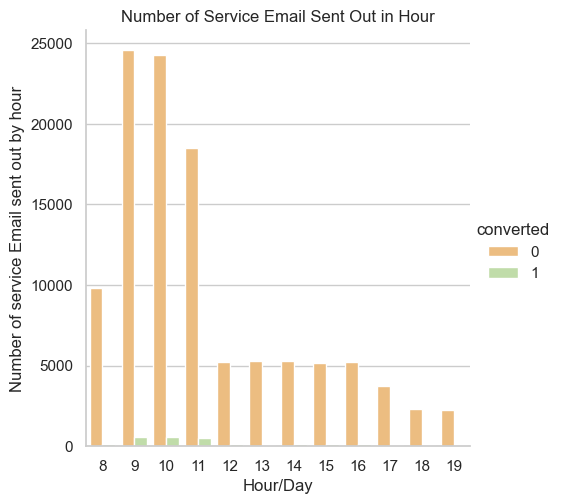

In [219]:
#ralte to hour?
# plot and count number of customer in hour

hr_count= sns.catplot(x='hour', kind='count',hue = 'converted',palette='Spectral', data=df)

# add label and title
hr_count.set(xlabel = 'Hour/Day', ylabel = 'Number of service Email sent out by hour',title = 'Number of Service Email Sent Out in Hour')

In [220]:
df.groupby('hour', as_index=False).converted.sum()

,hour,converted
0,8,137
1,9,545
2,10,577
3,11,527
4,12,117
5,13,95
6,14,125
7,15,118
8,16,113
9,17,84


Between 9am and 11am is the peak time for mail delivery,and these times have higher conversion rates of 545,577 and 527 respectively. While 18 pm and 19pm are the lowest period of Email delivery, these times are also low conversion rates of 78,88.

Therefore,the correlation between Email send out time and conversion rate may be relatively high.

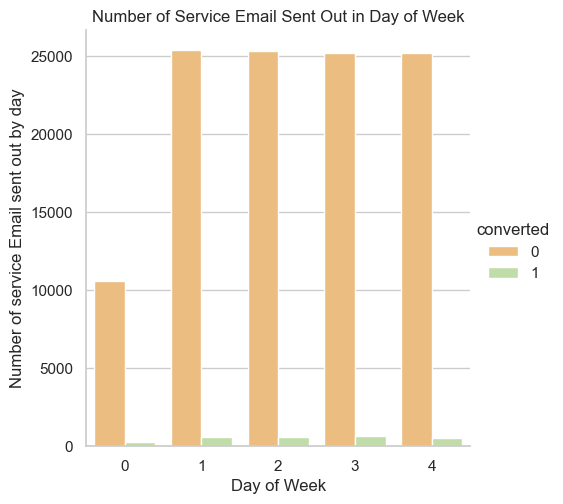

In [221]:
#ralte to day of week?
# plot and count number of customer in day of week
# 0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'

week_count= sns.catplot(x='dayofweek', kind='count',hue = 'converted',palette='Spectral', data=df)

# add label and title
week_count.set(xlabel = 'Day of Week', ylabel = 'Number of service Email sent out by day',title = 'Number of Service Email Sent Out in Day of Week')

In [222]:
df.groupby('dayofweek', as_index=False).converted.sum()
plit(show)

,dayofweek,converted
0,0,267
1,1,601
2,2,571
3,3,625
4,4,540


The number of Emails sent out from Tuesday to Friday is almost about 25,000, and on Monday it is only about 10,000. The conversion values from Tuesday to Friday were similar too at 601,571,625 and 527 respectively. Monday's conversion value was 267.But thursday's conversion rate was 2.5%, which was close to monday's conversion rate of 2.7%, about 0.2% lower.

Therefore,the conversion rate may have a strong relationship with the total number of emails sent out. Choose to send emails on weekdays to get higher click-through rates and conversion rates.